# nesis newt count data #

Some preliminary data analysis for the newt counts I've collected so far!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

In [2]:
newts = pd.read_csv('data/newt count data - 2.22.26.csv')

Here is pretty much my raw data table, just without a couple rows from the one time we counted in the afternoon as well.

In [3]:
# remove that one time we counted the newts in the afternoon too
cleaned = newts.drop(newts.iloc[12:16].index).reset_index(drop=True)
cleaned.Date = pd.to_datetime(cleaned['Date'])
cleaned

,Trip Number,Date,Quadrant,Observer,Start Time,End Time,Adult Newts,Larvae,Egg Masses,Notes
0,1.0,2025-03-09,1,Kannon,10:08 AM,10:13 AM,1,4,150,NaN
1,1.0,2025-03-09,2,Erin,10:08 AM,10:13 AM,6,0,89,NaN
2,1.0,2025-03-09,3,Kannon,9:56 AM,10:01 AM,6,9,131,NaN
3,1.0,2025-03-09,4,Erin,9:56 AM,10:01 AM,10,7,24,NaN
4,2.0,2025-04-12,1,Kannon,9:47 AM,9:54 AM,12,7,17,kannon doesn't know how tally marks work
...,...,...,...,...,...,...,...,...,...,...
59,15.0,2026-01-27,4,Erin,10:00 AM,10:05 AM,22,0,9,NaN
60,16.0,2026-02-20,1,Connor,10:02 AM,10:08 AM,13,0,40,NaN
61,16.0,2026-02-20,2,Megan,10:02 AM,10:08 AM,8,0,91,NaN
62,16.0,2026-02-20,3,Erin,9:48 AM,9:55 AM,18,0,127,def undercounting the eggs a bit- there was a ...


In [4]:
adults_quad = cleaned.pivot_table(values = 'Adult Newts', index = 'Date', columns = 'Quadrant').reset_index()

Here's a graph showing the number of adult newts per quadrant. There is a lot of variability! Some of it may be explained by the fact that it was not always the same person counting each time. However, I think there's inherently a lot of variablility because even the two quadrants that I counted almost exclusively (3 and 4) have have quite a lot of variability. Perhaps in the future I can calculate regression lines and errors to see if the quadrants that I do have lower MSE than the other two...

Text(0.5, 1.0, 'Newts per Quadrant of Japanese Pool')

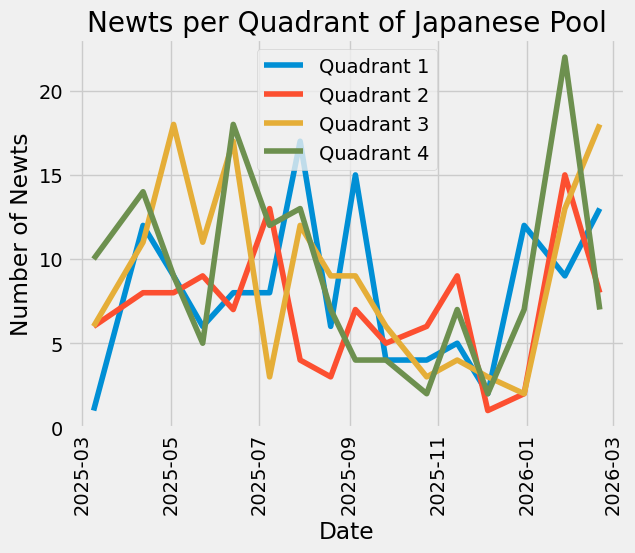

In [5]:
plt.plot(adults_quad['Date'], adults_quad[1], label = 'Quadrant 1')
plt.plot(adults_quad['Date'], adults_quad[2], label = 'Quadrant 2')
plt.plot(adults_quad['Date'], adults_quad[3], label = 'Quadrant 3')
plt.plot(adults_quad['Date'], adults_quad[4], label = 'Quadrant 4')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Newts')
plt.title('Newts per Quadrant of Japanese Pool')

In [6]:
adults_quad['Total'] = adults_quad[1] + adults_quad[2] + adults_quad[3] + adults_quad[4]
adults_quad.head()

Quadrant,Date,1,2,3,4,Total
0,2025-03-09,1.0,6.0,6.0,10.0,23.0
1,2025-04-12,12.0,8.0,11.0,14.0,45.0
2,2025-05-03,9.0,8.0,18.0,9.0,44.0
3,2025-05-23,6.0,9.0,11.0,5.0,31.0
4,2025-06-13,8.0,7.0,17.0,18.0,50.0


Here's a graph showing the total newt counts, summed from each of the 4 quadrants. This graph *seems* to have somewhat less variability than the individual quadrants... right?? From March, there is a general increase in newt count until we hit a peak around June, after which it decreases as we transition to fall. 

Text(0.5, 1.0, 'Monthly Newt Counts at the Japanese Pool')

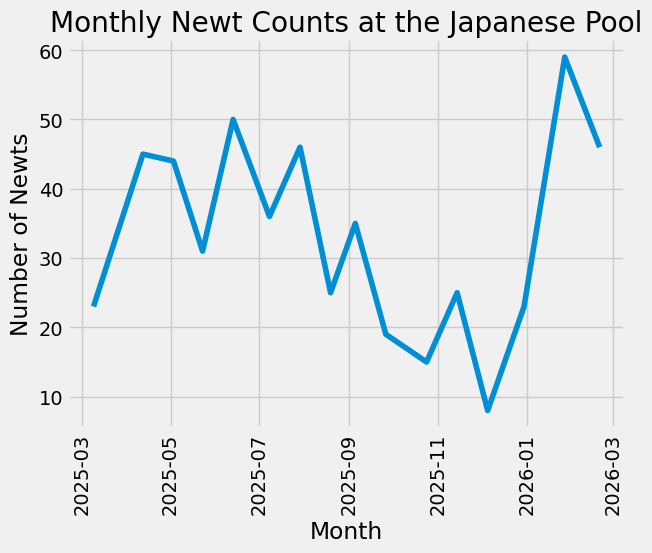

In [10]:
plt.plot(adults_quad['Date'], adults_quad['Total'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Number of Newts')
plt.title('Monthly Newt Counts at the Japanese Pool')

In [8]:
larvae_quad = cleaned.pivot_table(values = 'Larvae', index = 'Date', columns = 'Quadrant').reset_index()
egg_quad = cleaned.pivot_table(values = 'Egg Masses', index = 'Date', columns = 'Quadrant').reset_index()

larvae_quad['Total'] = larvae_quad[1] + larvae_quad[2] + larvae_quad[3] + larvae_quad[4]
egg_quad['Total'] = egg_quad[1] + egg_quad[2] + egg_quad[3] + egg_quad[4]

egg_quad

Quadrant,Date,1,2,3,4,Total
0,2025-03-09,150.0,89.0,131.0,24.0,394.0
1,2025-04-12,17.0,39.0,25.0,6.0,87.0
2,2025-05-03,0.0,7.0,42.0,0.0,49.0
3,2025-05-23,0.0,0.0,0.0,0.0,0.0
4,2025-06-13,0.0,0.0,0.0,0.0,0.0
5,2025-07-08,0.0,0.0,0.0,0.0,0.0
6,2025-07-29,0.0,0.0,0.0,0.0,0.0
7,2025-08-19,0.0,0.0,0.0,0.0,0.0
8,2025-09-05,0.0,0.0,0.0,0.0,0.0
9,2025-09-26,0.0,0.0,0.0,0.0,0.0


Now here is our big cool graph with data for adult, larva, and egg mass counts! The egg masses high key inflate the y-axis, there's so freaking many of them around March (394)! Interestingly, this does not coincide with the month with the most adults, which is a few months later around June. There can be multiple explanations for this: We tended to undercount in the first few months because we were not as experienced at counting newts, different people counting, etc. Or perhaps June is really the month with the true largest number of newts, but by then many of the egg masses from earlier breeding have been eaten / hatched?

UPDATE 2/22/26: It is now February that has the highest number of adult newts at 59!

Either way, it's fun to see that the egg mass line looks like it has the least variance, which makes sense given egg masses are stationary and therefore much easier to count. This also eliminates the risk of double-counting. Larvae are definitely the most difficult to see, therefore it  would make sense that they probably have the most variability between counters. (skill issue)

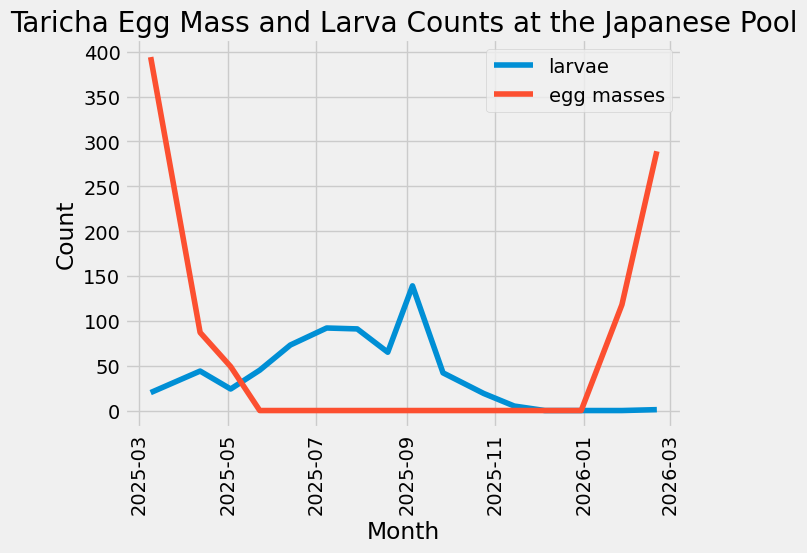

In [12]:
#plt.plot(adults_quad['Date'], adults_quad['Total'], label = 'adults')
plt.plot(larvae_quad['Date'], larvae_quad['Total'], label = 'larvae')
plt.plot(egg_quad['Date'], egg_quad['Total'], label = 'egg masses')

plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Taricha Egg Mass and Larva Counts at the Japanese Pool')
plt.legend()

## Update 2/6/26
Wow!! Eggs are back!! Adult counts are also the highest ever as of the Jan 27th trip! Also I just realized that the large spike on 9/9/25 coincides with the first time we got and used polarized sun glasses LOL

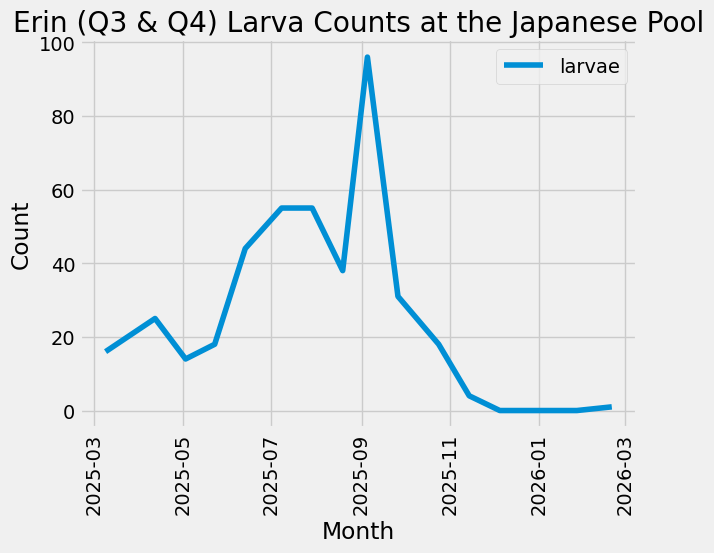

In [ ]:
plt.plot(larvae_quad['Date'], larvae_quad[3] + larvae_quad[4], label = 'larvae')

plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Erin (Q3 & Q4) Larva Counts at the Japanese Pool')
plt.legend()

Above is a table with j my larva counts. i was trying to see if maybe the weird spike on 9/9/25 was like user error or like the volunteer that day went kinda crazy w the newt counts. but apparently it was mostly me bc the spike is way higher for my graph than the volunteer graph..... which would indicate that maybe i was a little generous that day w the larva counts lol. maybe bc i expected to see more bc i had polarized sunglasses for the first time??

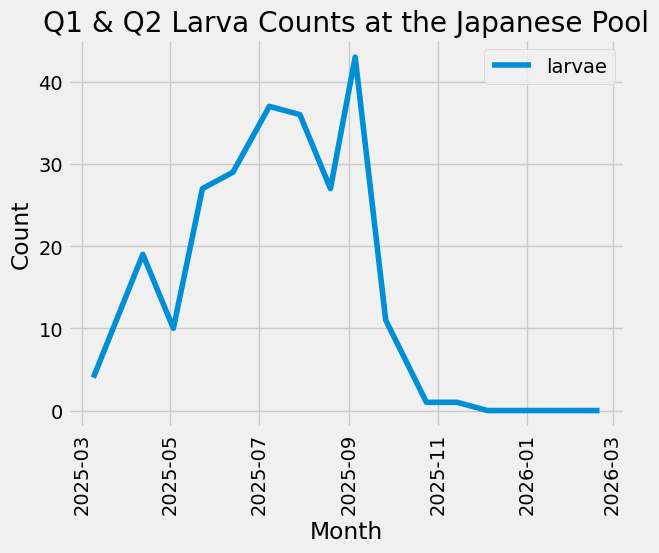

In [ ]:
plt.plot(larvae_quad['Date'], larvae_quad[1] + larvae_quad[2], label = 'larvae')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Q1 & Q2 Larva Counts at the Japanese Pool')
plt.legend()